In [241]:
from Backtest import Backtest,Position,Bid
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [242]:
class Strategy():
    def __init__(self):
        self.cache = {}
    def compute(self, window):
        return np.ones_like(window.iloc[0])/len(window.iloc[0])
    def update(self, window):
        return


class EXP3_trading(Strategy):
    def __init__(self, k, η):
        super(EXP3_trading,self).__init__()
        self.k = k
        self.η = η
        self.S = []
        self.P = []
        self.X = [0]
        self.regret = [0]
        self.A = []
        self.S.append(np.zeros(k))
    def compute(self, window):
        #prob dist @ t
        print()
        Pt = np.exp(self.η*self.S[-1])/np.exp(self.η*self.S[-1]).sum()
        self.P.append(Pt)
        print(Pt)
        #action @ t
        At = self.draw(Pt)
        print(At)
        self.A.append(At)
        # res = np.zeros(self.k)
        # res[At] = 1
        return Pt
    def update(self, window):
        #reward. @ t
        Xt = np.log(window.iloc[-1,:].values[self.A[-1]])
        
        #
        self.X.append(self.X[-1]+Xt)
        
        #action int
        At = self.A[-1]
        
        #last weights + 1?
        St = self.S[-1]+1
        
        St[At] = St[At]-(1-Xt)/self.P[-1][At]
        print(St)
        self.S.append(St)
        return
    def draw(self, Pt):
        cut = np.random.uniform(0,1)
        for i in range(len(Pt)):
            cut -= Pt[i]
            if cut < 0:
                break
        return i

In [194]:
df = pd.read_csv("test_data.csv",index_col = 0)
df = df.iloc[:,:10]

In [195]:
df.index = pd.to_datetime(df.index)

In [196]:
df = df/df.shift(1)-1
df.dropna(axis = 0,inplace = True)

In [234]:
df['new'] = df.max(axis = 1)

In [235]:
df

,0,1,2,3,4,5,6,7,8,9,new
2019-04-01 09:31:00,0.000497,0.000367,-0.000878,-0.002081,0.000498,-0.006829,0.002978,0.004794,-0.002823,-0.001578,0.004794
2019-04-01 09:32:00,0.000229,-0.001260,0.003222,-0.000894,0.000000,0.000982,-0.000106,-0.005877,-0.001594,0.001608,0.003222
2019-04-01 09:33:00,-0.000306,0.000263,-0.003285,-0.000895,-0.000498,-0.003925,-0.000106,-0.001020,0.001953,0.000911,0.001953
2019-04-01 09:34:00,0.001056,-0.000104,-0.001904,0.000000,0.000498,0.003448,0.001167,0.001327,0.003795,0.001220,0.003795
2019-04-01 09:35:00,-0.002338,-0.000685,0.003008,0.002537,-0.002485,0.000491,-0.000848,0.006775,0.000177,0.000884,0.006775
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-30 16:26:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.009654,0.003876,0.000000,0.003876
2019-04-30 16:27:00,-0.004885,0.001878,-0.007203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000891,0.001878
2019-04-30 16:28:00,0.000000,0.000000,0.000000,-0.002256,0.000000,0.000000,0.000000,0.008773,0.000000,-0.000027,0.008773
2019-04-30 16:29:00,0.000000,-0.001874,0.000000,0.000000,-0.007413,0.000000,0.000000,-0.009083,0.002166,-0.000863,0.002166


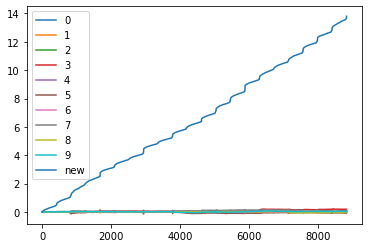

In [236]:
plt.figure()
for col in df.columns:
    plt.plot(df[col].cumsum().values,label = col)

plt.legend()

In [237]:
df.columns = [i for i in range(11)]

In [238]:
class EXP3:
    def __init__(self,data,gamma):
        self.data = data
        self.num_actions = len(self.data.columns)
        self.gamma = gamma
        self.weights = [1]*self.num_actions
        self.rewards = []
        
    
    #get current distribution
    def get_distr(self):        
        theSum = float(sum(self.weights))
        return tuple((1.0 - self.gamma) * (w / theSum) + (self.gamma / len(self.weights)) for w in self.weights)
    
    #draw an action from distribution
    def draw(self,weights):
        choice = random.uniform(0, sum(weights))
        choiceIndex = 0
        for weight in weights:
            choice -= weight
            if choice <= 0:
                return choiceIndex
            choiceIndex += 1
            
    def get_reward(self,ti,choice):
        actual_reward = self.data.loc[ti,choice]
        
        
        if self.data.loc[ti].max() - self.data.loc[ti].min() != 0:
            scaled_reward = (actual_reward - self.data.loc[ti].min())/(self.data.loc[ti].max() - self.data.loc[ti].min())
        else:
            scaled_reward = 0 
        return actual_reward,scaled_reward
        
    
    def reset(self):
        self.weights = [1]*self.num_actions
        
        
        
        
        
        
    #get test
    def test(self):
        for ti in self.data.index:
            

                

            ProbabilityDistribution = self.get_distr()
            choice = self.draw(ProbabilityDistribution)
            
            actual_reward,scaled_reward = self.get_reward(ti,choice)
            print(choice,' ',scaled_reward)
            
            estimatedReward = 1.0 * scaled_reward / ProbabilityDistribution[choice]

            self.rewards.append(actual_reward)
            #print(np.exp(estimatedReward * self.gamma / self.num_actions))
            self.weights[choice] *= np.exp(estimatedReward * self.gamma / self.num_actions)
            
            
            
            
            
            

In [239]:
exp3 = EXP3(df,0.7)
exp3.test()

2   0.5120294898837643
7   0.0
3   0.515568390455309
0   0.5193091158643378
5   0.32138974988302427
7   0.0
4   0.818816515183506
0   0.8263499906973989
4   0.602403200288872
0   0.8901644506118487
10   1.0
9   0.8258857385342945
6   0.6208682545512018
5   0.3280211177391427
10   1.0
7   1.0
4   0.5022602394618148
1   0.8164512388464347
4   0.7615696679099373
6   0.23435306197401362
9   0.47915510632288155
0   0.9893504289273876
4   0.9070967971594232
6   0.9720237773882965
0   0.24931470002813402
5   0.0
5   0.4317414808263084
4   0.5944009901000551
3   0.6983280360705892
6   0.016440869794788444
1   0.5562639120831103
7   0.5682482344156979
0   0.290278418424959
10   1.0
4   0.6346722376060947
4   0.7945871008416517
7   0.26055798130687113
5   1.0
4   0.6901605341235402
8   0.3003796874872193
9   0.2235787469392432
4   0.4635180478494927
0   0.8837988080579583
9   0.4657426465579138
7   0.4386762549758857
4   0.0888525609864316
8   0.6702485352025986
4   0.5774378217062811
8   0.8599

0   0.7883893215333094
7   0.4990509075711488
10   1.0
8   0.6706616496345892
8   0.4527632772158308
10   1.0
4   0.1997634617274927
4   0.6318874560375015
10   1.0
7   0.5212726741419883
10   1.0
4   0.08640624452529874
10   1.0
4   0.0
10   1.0
2   1.0
2   0.49133674252696546
10   1.0
0   0.4990508202912828
10   1.0
8   0.4103593191416222
4   0.8763907378428887
10   1.0
5   0.7068690432211833
7   0.3205415810839515
0   0.40091144562154274
10   1.0
2   0.0
10   1.0
7   0.0
4   0.8919608196467357
7   0.9636918230660585
1   0.5084865174228126
10   1.0
10   1.0
5   0.01158123083427387
1   0.0
10   1.0
5   0.8975520251405245
10   1.0
10   1.0
8   0.10101116677887075
10   1.0
2   1.0
10   1.0
10   1.0
3   0.8648243193880469
2   1.0
10   1.0
10   1.0
10   1.0
4   0.3529475254709895
3   0.7641190133127325
5   1.0
10   1.0
4   0.5580850101692536
10   1.0
10   1.0
8   0.3702475014048054
10   1.0
10   1.0
1   0.6267720727803239
0   0.0
10   1.0
10   1.0
7   0.0
3   0.724190477273544
0   0.0
10 

8   0.662607464098956
5   1.0
10   1.0
0   0.5580403644509532
10   1.0
2   0.911842304758672
2   0.11522454193375398
2   0.9579938542538123
10   1.0
10   1.0
9   0.36702588170683237
10   1.0
10   1.0
4   0.4752993329256556
10   1.0
10   1.0
10   1.0
8   0.789449260057803
6   1.0
10   1.0
9   0.22187844655778888
8   0.6040484277304544
10   1.0
8   0.7322398233474448
8   1.0
10   1.0
2   0.0
0   0.7496895609337602
7   0.6394405465615671
1   0.5253200969822168
10   1.0
4   0.0021298773304231147
7   0.8921530539500736
10   1.0
10   1.0
10   1.0
3   1.0
10   1.0
10   1.0
0   0.014319959204617401
6   0.33636250239225046
8   0.6472056091433631
0   0.06687981143939824
10   1.0
0   0.7117852869292373
6   0.2220361579344323
4   0.059659069659589586
7   1.0
7   0.5384569461298182
3   1.0
7   0.6478876778118964
10   1.0
10   1.0
5   0.0
10   1.0
6   0.9652684731059581
10   1.0
6   0.3264797837952771
10   1.0
10   1.0
10   1.0
10   1.0
10   1.0
10   1.0
5   1.0
7   0.1947865181850324
10   1.0
10   

8   0.28058711140733844
4   0.0
1   0.7962609665920647
8   0.9125426776993487
10   1.0
2   0.7899435376990037
3   0.6700750947655505
6   0.9309870938270038
4   0.6978561721680641
2   0.9274977963817123
1   0.6387488251923363
10   1.0
5   0.16565475033986649
10   1.0
10   1.0
0   0.421606027624157
8   0.2451235565627675
1   0.40861044923051887
9   0.23873477760742837
10   1.0
10   1.0
10   1.0
5   1.0
10   1.0
5   0.0
10   1.0
6   0.0955383171900065
8   0.45935041355668565
10   1.0
4   0.5511881369074424
8   0.0
10   1.0
8   0.5178606797380774
1   0.5412148743138596
3   0.632786609151916
6   0.7396845095317239
10   1.0
2   0.2833356843817185
10   1.0
6   0.39924221318313025
0   0.9194020455326812
2   1.0
10   1.0
10   1.0
4   0.0
10   1.0
10   1.0
10   1.0
4   0.0
7   1.0
4   0.9688937194799006
6   0.28616984402074025
10   1.0
2   0.7446977291991683
9   0.6680761958224736
7   0.0
3   0.0
2   0.8736142633303996
10   1.0
10   1.0
6   0.9986873237827674
1   0.0
8   0.03680632824361135
1   

6   0.7061632974224329
1   0.40824447075088915
10   1.0
7   0.0
9   0.31513607629217844
6   0.7491459815498861
9   1.0
9   0.32197669583900745
5   0.8684547489706108
6   0.755561623145457
6   0.539052604093176
10   1.0
8   0.6412556611386175
10   1.0
9   0.018984448873660867
10   1.0
10   1.0
9   0.1487603324721667
7   0.0
10   1.0
2   0.9744756500579761
10   1.0
10   1.0
3   0.5576545485471496
10   1.0
10   1.0
10   1.0
2   0.9454747828878812
5   0.0
10   1.0
10   1.0
10   1.0
3   0.33052810318255377
4   0.598469673021024
4   0.48529595573099904
10   1.0
10   1.0
3   0.6178478347984515
8   0.0
4   0.5345664997907884
10   1.0
10   1.0
3   0.0
5   1.0
8   0.48674139181821724
8   0.5919954269243113
10   1.0
1   0.9563602950668081
2   0.2484952026098526
10   1.0
1   0.3284437043704964
3   0.7726977025229679
4   0.5610321450200791
8   0.4595035692455421
9   0.5510485331760999
8   0.2507857677741399
10   1.0
0   0.872894806432384
7   0.6229466473782687
10   1.0
2   0.32318007481579053
10   

6   0.4908850160720384
3   0.23984252658638985
4   0.957528158757309
10   1.0
6   0.34893597640725155
9   0.8913190240802297
1   0.3121575548090411
10   1.0
5   0.0
7   0.0
7   0.5682772603896824
10   1.0
6   0.9836366620140086
1   0.28507130898036587
1   0.4636531425364563
7   0.0
3   0.07870996876423224
2   0.5777893296353768
10   1.0
9   1.0
6   0.5049132561718795
3   0.599909171228741
10   1.0
10   1.0
1   0.4831897954738675
1   1.0
10   1.0
10   1.0
2   0.7531275902611122
10   1.0
6   0.10832244985873324
10   1.0
1   0.3681426423072513
9   0.5133181807805439
10   1.0
6   0.3908650080597319
9   0.43971735287564556
5   1.0
6   0.9305324624324316
10   1.0
10   1.0
9   0.038645991876775365
8   0.841982635398681
10   1.0
8   0.8156340341987655
10   1.0
5   0.4801141115513226
10   1.0
2   0.0
8   0.858656845230328
10   1.0
4   0.0
8   0.6494815759604309
10   1.0
1   0.470690695417326
10   1.0
10   1.0
10   1.0
3   0.430633198903102
10   1.0
10   1.0
9   0.44939262844558203
10   1.0
10  

10   1.0
10   1.0
0   0.6499506431672623
1   0.33143600196532
10   1.0
10   1.0
10   1.0
10   1.0
10   1.0
10   1.0
9   0.691872687771159
10   1.0
4   0.6175833246304908
10   1.0
5   0.13487619285071917
10   1.0
5   0.8992927690750887
7   1.0
10   1.0
7   0.3851489226664479
10   1.0
2   0.6514827423971854
2   0.14509941723140513
10   1.0
3   0.8115897658323289
10   1.0
6   0.4070089118348591
3   0.5301084284203199
10   1.0
3   0.7762099509532917
7   0.5670843630580724
3   0.4911120512571007
5   0.21119996793825999
10   1.0
5   0.5638422872584727
6   1.0
3   0.5946938394690089
2   0.13891657777154479
10   1.0
0   0.8186087367043093
9   0.9144096213644538
10   1.0
10   1.0
7   0.4804168840745597
6   0.5591927205281028
4   0.8076323687113506
5   1.0
5   0.8127296244195461
10   1.0
4   0.7429786523188355
3   0.4209757944123126
3   1.0
4   0.3467890537303577
2   0.6546841940530468
10   1.0
10   1.0
8   0.6778943769794298
10   1.0
1   0.0
1   0.4093696209042282
10   1.0
0   0.991923955159117

0   0.0
3   0.7122172794721667
10   1.0
1   1.0
3   0.0
5   0.8412751453585973
10   1.0
4   0.8840937611962802
10   0
4   0.0
10   1.0
10   1.0
10   1.0
9   0.0
10   0
7   0.8883760935812635
8   0.05830080079369918
10   1.0
10   1.0
4   0.0
2   0.0
8   0.15580978634543516
6   1.0
3   1.0
3   0.0
10   1.0
10   1.0
9   0.0926164555583165
4   0.25631254755108807
2   0.21802325105241815
9   0.6838947245824939
7   0.7574821120087112
10   1.0
4   0.9800134559689013
5   0.43324848449363174
5   1.0
5   0.5764153356679453
2   1.0
10   1.0
10   1.0
1   0.4671418982399487
2   0.0
5   0.2426841889451939
10   1.0
9   0.19191843455405805
7   0.830532748896935
10   1.0
9   0.0
2   0.496253060713846
10   1.0
5   1.0
10   1.0
8   0.7028887011301118
9   0.22590997923001202
8   0.37473332676387444
10   1.0
5   0.25709233828518835
6   0.4885011193238717
1   0.9906240969070463
1   0.4868414275439283
5   0.05417861386695037
10   1.0
5   0.32857316897889427
10   1.0
6   0.7152762061627681
6   0.4024412564144

10   1.0
5   0.0
2   0.9559993384487554
10   1.0
5   0.5223519507497905
10   1.0
9   0.5538159513118772
2   1.0
7   0.932645235951632
7   0.0
10   1.0
6   0.09669249428209976
7   0.316245584658639
10   1.0
10   1.0
10   1.0
0   0.23986330438885964
9   0.4526597816360374
2   1.0
10   1.0
4   0.6249459040958596
4   0.5351826564417014
1   0.6994931962385873
10   1.0
3   0.8176033093802603
10   1.0
7   0.31057161790269555
10   1.0
3   0.0
4   0.3079551217488237
5   1.0
6   0.35147065590707255
10   1.0
0   0.22238919431575277
10   1.0
10   1.0
0   0.0
0   0.3216180374960818
10   1.0
10   1.0
8   0.8268276453052845
5   0.0
10   1.0
1   0.6117936876341454
10   1.0
8   1.0
6   0.8546732890484555
4   0.0
8   0.9431142737355639
1   0.0
10   1.0
2   0.0
2   0.9285904657252017
10   1.0
10   1.0
0   0.6040946201040549
10   1.0
10   1.0
4   0.5019687895119139
2   0.0
10   1.0
8   0.942855027367653
4   0.0
3   0.5584340296186638
0   0.13807737000693684
8   0.42984112272829056
8   0.529427079598897
2 

9   0.3658983134842488
10   1.0
2   0.25612930323446687
8   0.47989969774444147
3   0.6922043748827728
1   0.6077360745924041
10   1.0
3   0.08029719334373639
6   0.830546521550438
10   1.0
0   0.5993386805943429
4   0.19093875464264445
10   1.0
3   0.11628682584169356
0   0.3729609874967351
7   1.0
10   1.0
10   1.0
3   0.6882390586441065
4   0.49043650312164794
10   1.0
10   1.0
6   0.527949540546477
5   0.3871321930066817
10   1.0
9   0.0
10   1.0
1   0.09023433226168748
10   1.0
1   0.6096625016291393
10   1.0
6   0.6291315060379633
5   0.02160922939858286
10   1.0
7   0.0
3   0.8072130483883668
0   0.3539266500987355
5   0.31048398778389147
7   0.9154862709127979
10   1.0
5   0.674399479458419
9   0.0
10   1.0
3   1.0
7   0.2442713578847914
1   0.7454679747355392
9   0.7900816806883195
9   1.0
10   1.0
6   0.20811893273153376
10   1.0
5   1.0
10   1.0
2   0.65978163725984
4   0.822893818686596
0   1.0
1   0.14866283714471606
10   1.0
1   0.19585993241061692
10   1.0
10   1.0
2   0

5   0.6391738043524587
4   0.32519016899308634
10   1.0
9   0.5228133794788499
1   0.17665981456576402
2   0.40070175185929996
9   0.9459598038431835
8   0.37269655979885546
2   0.44067491946546167
4   0.383512365138183
6   0.2522391579030119
10   1.0
10   1.0
4   0.7088970889514673
10   1.0
10   1.0
10   1.0
8   0.42882904479682366
2   0.6000095641940589
2   1.0
0   0.5694751897352308
10   1.0
1   0.3761572151332976
2   1.0
10   1.0
10   1.0
10   1.0
10   1.0
4   0.6730089052398127
8   0.883643620472457
4   0.031067625883007384
4   0.5176821404261156
5   1.0
0   0.5435650665950411
8   0.7496149944450852
8   0.6070492626213108
1   0.5992392926611815
3   0.4328644528679659
10   1.0
8   0.3425705249524732
4   1.0
4   0.31606267933008764
0   0.4472127981016897
10   1.0
10   1.0
7   0.0
4   0.9127998258060067
2   0.0
10   1.0
10   1.0
8   0.349883402371951
10   1.0
10   1.0
9   0.5919883350575562
5   1.0
10   1.0
10   1.0
9   0.7926163045373189
10   1.0
0   0.3442834224176363
2   0.4077659

10   1.0
10   1.0
0   0.6318792185061494
3   0.574305614549466
10   1.0
10   1.0
0   0.14323082848968777
5   0.0
5   1.0
10   1.0
7   0.6452515411996229
10   1.0
1   0.6983468623506943
10   1.0
7   0.5200310448578183
4   0.4518531888863365
10   1.0
1   0.07010419800368091
0   1.0
10   1.0
5   0.44137106022428585
1   0.5900712853660931
0   0.5052155906793746
1   0.6542336215678978
10   1.0
8   0.19843525077512228
7   0.7954393737923703
7   0.39428356844763274
8   0.6870382510677455
5   0.0
2   0.721004422957927
4   0.9238620555109199
1   0.5812072819042796
4   0.20980455674340515
1   0.5848018888468397
10   1.0
5   0.7206235620193133
10   1.0
1   0.48696129797234666
8   0.5998672683765616
10   1.0
10   1.0
5   0.17451465370140615
10   1.0
1   0.3198827316902962
4   0.2260542251080387
3   0.8758444408680657
10   1.0
1   0.2655394451669946
2   0.22488664991786916
10   1.0
4   0.36241017767811934
0   0.8558363931924378
5   1.0
10   1.0
6   0.3200416526775261
9   0.5686315592638846
10   1.0

3   0.859876488593308
2   0.0
8   0.04568716343785946
10   1.0
10   1.0
10   1.0
1   0.2611813287651697
10   1.0
4   0.3988618308002097
10   1.0
10   1.0
5   0.6414913727015917
10   1.0
0   1.0
10   1.0
10   1.0
10   1.0
7   0.23078490627340786
10   1.0
7   0.6358293034510891
10   1.0
8   0.0
6   0.3403948559291996
9   0.9633799563864638
4   0.5977922839669366
3   0.9203490048629522
7   0.5900749170101204
10   1.0
4   0.8948105839907821
10   1.0
7   0.8818406648963664
5   0.04418207476712477
8   0.1804963999628596
2   1.0
10   1.0
9   0.44415860500434834
5   0.380168157800865
10   1.0
1   0.48646688254843307
10   1.0
6   0.17586616651710105
1   1.0
10   1.0
1   1.0
2   0.0
2   0.03642288343295046
10   1.0
10   1.0
1   0.15063980759904166
9   0.2683483602055044
3   1.0
10   1.0
10   1.0
10   1.0
2   1.0
3   0.5392669218733204
2   0.0
8   0.4524413671343898
7   0.6829941306581845
5   1.0
10   1.0
10   1.0
3   0.0
10   1.0
3   1.0
10   1.0
10   1.0
7   0.7292830470266217
9   0.76270615685

3   1.0
10   1.0
10   1.0
10   1.0
3   0.0
2   1.0
10   1.0
0   0.6913011031091362
5   0.06712670650577417
9   0.5816455894481593
10   1.0
1   0.7945154988526221
3   1.0
5   0.0
9   0.5705450612666975
7   0.07192110425488304
10   1.0
7   0.07372312825900773
6   0.7202918270785713
3   0.5782594926926664
10   1.0
2   0.6886065129328119
7   0.4370974210642001
7   0.5562384213905056
3   0.2865437649411807
10   1.0
10   1.0
5   1.0
0   0.5510547046421611
10   1.0
8   1.0
10   1.0
0   0.8259180743591474
1   0.8608890881734462
2   0.0
10   1.0
10   1.0
2   0.8048902592579487
9   0.1629317281061149
10   1.0
1   0.40464525263409
1   0.48862199363614317
3   1.0
6   0.4802284000764329
10   1.0
9   0.3805447235241127
6   0.3259184756640729
10   1.0
2   0.47621889982167476
10   1.0
9   0.440368800360079
10   1.0
3   0.8401941774659294
10   1.0
10   1.0
1   0.6001452356355054
10   1.0
3   1.0
2   0.5061616400475847
4   0.577895360614686
10   1.0
10   1.0
8   0.7473000032736795
1   0.9785050816704923

5   0.0
10   1.0
2   0.8929905531654605
7   0.257846297318498
1   0.9421376561844599
6   0.24410263648852604
10   1.0
10   1.0
2   0.8277669425449186
8   0.6931291518835204
10   1.0
2   0.3280882409701898
10   1.0
10   1.0
0   0.44665612774644203
7   0.8197473316103197
3   0.5005298920275112
10   1.0
10   1.0
10   1.0
10   1.0
3   0.08666465969151554
5   1.0
10   1.0
10   1.0
6   0.6380263355611647
10   1.0
5   1.0
2   0.0866636765611404
9   0.6720417427309794
1   0.4939843512833671
10   1.0
8   0.31200878618564304
0   0.09994497131361271
10   1.0
5   0.07924861484219471
2   0.6216220171622578
0   1.0
4   1.0
8   0.7021800209938355
1   0.5467916736139357
1   0.5148888108679256
10   1.0
10   1.0
9   0.8721828098110384
9   0.7107854375521017
10   1.0
10   1.0
1   0.1675630477214457
9   0.0
10   1.0
4   0.9316711158845318
1   0.05518292288534267
9   0.6367640084016604
0   0.5233999267948571
6   0.17288365156796032
10   1.0
10   1.0
7   0.13208882200615307
4   0.7621978282096374
0   0.0683

4   0.8600923478675214
9   0.3047464225700527
10   1.0
0   0.6194827501793971
1   0.6371811224352403
8   0.6527700004714914
8   0.6063966543184274
10   1.0
10   1.0
10   1.0
10   1.0
7   1.0
10   1.0
7   1.0
8   0.8794206692700097
10   1.0
10   1.0
10   1.0
5   0.4247376582309185
10   1.0
10   1.0
10   1.0
2   0.7846813047845449
8   0.431235377911267
10   1.0
4   0.25738138789141884
6   0.38082507347987626
10   1.0
4   1.0
10   1.0
4   0.8949761571295116
10   1.0
2   0.0
10   1.0
4   0.42797807997525
8   0.8053107641089299
7   0.9987927834221408
10   1.0
10   1.0
8   0.8506895392571916
10   1.0
10   1.0
10   1.0
9   0.28302594783302937
10   1.0
2   0.5574986736265527
2   0.5969950656110911
8   0.28459270709439727
5   0.43815364160427783
7   0.8057539268374887
10   1.0
10   1.0
4   0.37496549158888415
10   1.0
10   1.0
10   1.0
3   0.17752582372909814
9   0.7282225450332833
2   0.15366664895336363
10   1.0
6   0.24375491861745463
8   0.7651150101478439
8   0.23868358514248822
2   1.0
2 

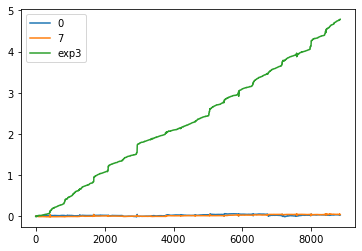

In [240]:
plt.plot(df[0].cumsum().values,label = 0)
plt.plot(df[1].cumsum().values,label = 7)
plt.plot(np.array(exp3.rewards).cumsum(),label = 'exp3')
plt.legend()

In [31]:
exp3.rewards

[2.9057068046314924e-05,
 -0.0018298719308008674,
 -0.0011769854382261357,
 6.990620167866652e-05,
 -0.00034393707013696145,
 0.005611739816130799,
 0.004509022820279895,
 -0.0001432743838308951,
 0.002249352313122567,
 0.00020804358519385294,
 -0.00494150791905077,
 0.004659038582045812,
 0.0016369607270933762,
 -0.0009840314024666288,
 0.002021862347506346,
 0.002729292252844868,
 0.0035760871150931463,
 -0.002064931273026073,
 -0.0006639026550088072,
 -0.0008085793285704655,
 -0.0036279006562505768,
 0.0012964281042811142,
 0.0025692969640327416,
 0.0015880595688764492,
 0.004304372639758764,
 0.002070985648655333,
 -0.0007002118946367115,
 -0.001098220775754894,
 0.0007769328173760372,
 -0.0012922600720079542,
 -0.0015445019765621118,
 -0.0014356053320668286,
 -0.0020891228797864604,
 0.002572229374911492,
 0.0013214047735175191,
 -0.002161933174319004,
 -0.002805808926328032,
 -0.00012118409015362023,
 -0.0012712727354496972,
 -0.0008483744198216823,
 0.0037591646643682173,
 0.003

In [130]:
def distr(weights, gamma=0.0):
    theSum = float(sum(weights))
    return tuple((1.0 - gamma) * (w / theSum) + (gamma / len(weights)) for w in weights)

In [132]:
weights = [0.2]*5
distr(weights,0.07)

(0.2, 0.2, 0.2, 0.2, 0.2)

In [34]:
data = data.iloc[:,:3]

In [ ]:
reward = 

In [53]:
def reward(current,previous):
    return current/previous - 1

weights = [1.0] * 3
gamma = 0.07
probabilityDistribution = distr(weights, gamma)

In [54]:
biases = [1.0 / k for k in range(2,12)]
rewardVector = [[1 if random.random() < bias else 0 for bias in biases] for _ in range(100)]

In [77]:
import os
import sys
from unittest import load_tests
import pandas as pd
import numpy as np
from scipy.stats import percentileofscore as score
from statistics import mean
from math import floor


class Backtest1:
    def __init__(self,
                 df:pd.DataFrame,   #indexed by time, price df
                 strategy: None,
                 cash: float = 100000,
                 commission: float = .001,
                 future = False):
        # check for NaN
        assert(not df.isnull().values.any())
        # check for time sequence
        if not df.index.is_monotonic_increasing:
            df = df.sort_index()

        self.df = df        # nxm (num_periods, num_assets)
        self.strategy = strategy
        self.stock_pool = self.df.columns
        self.init_cap = cash
        self.cash = cash               #currently used as init cap, need to be changed in realistic case
        self.portfolio_value = 0
        self.value = self.get_value()    #value = portfolio+cash
        self.X = self.get_X()
        self.S = []
        self.bs = []
        self.times = self.df.index
        self.times_X = self.X.index
        #self.current_time = self.times[0]
        #self.future = future
    def get_value(self):
#         self.value = self.cash+self.portfolio_value
        self.value = self.portfolio_value
        return self.value
    def get_value_array(self):
        return [i * 10000 for i in self.S]

    def get_cash(self):
        return self.cash
    def get_portfolio_value(self):
        return self.portfolio_value
    def get_X(self):
        return (self.df/self.df.shift(1)).dropna()
    def get_S(self):
        return [i for i in self.S]
    
    def algo2(self, positions,df_close):
        bid_info_list = []
        self.df = df_close
        f_close = self.df
        f_close = f_close.fillna(f_close.mean())
        f_close = f_close.dropna(axis='columns')
        strat = self.strategy
        #print(self.df)
        window = self.X.loc[:len(self.X)-1,:]
        b_temp = strat.compute(window)
        self.bs.append(b_temp)
        factor_temp = self.X.loc[len(self.X)].dot(b_temp)
        if self.S==[]:
            self.S.append(1.0)
            self.S.append(self.S[-1]*(self.X.iloc[0].dot(self.bs[0])))
        else:
            self.S.append(self.S[-1]*factor_temp)
        
        self.portfolio_value = self.S[-1]*self.init_cap
        self.portfolio_value = self.S[-1]*self.init_cap
        self.get_value()
        strat.update(window)
        sig_weight = {}
        ticker_list = list(f_close.columns)
        threshold = 0.01
        prices = f_close.iloc[-1]
        bid = 0
        for i in range(len(b_temp)):
            stock_id=ticker_list[i]
            try:
                temp = positions[stock_id].shares
            except:
                temp = 0

            previous_weight = float(temp)*float(prices[stock_id])/100000
            if abs(b_temp[i]-previous_weight)>=threshold:
                sig_weight[ticker_list[i]] = b_temp[i]
                value = (b_temp[i]-previous_weight)*100000
                
                if value <= 0:
                    bid = Bid(ticker = stock_id,price = prices[stock_id],shares= abs(value)//prices[stock_id],bid_type =0)
                else:
                    bid = Bid(ticker = stock_id,price = prices[stock_id],shares= value//prices[stock_id],bid_type =1)
                bid_info_list.append(bid)
        return bid_info_list
        


    def create_timed_portfolio_value(self):
        temp = np.array(self.S)*self.init_cap
        # times_temp = self.times.insert(0,self.times[0]-pd.to_timedelta(1, unit='d') )
        times_temp = self.times
        return pd.DataFrame(temp, index=times_temp, columns = ['portfolio_value'])
    def create_timed_return(self):
        temp = np.array(self.S)
        # times_temp = self.times.insert(0,self.times[0]-pd.to_timedelta(1, unit='d') )
        times_temp = self.times
        res = pd.DataFrame(temp, index=times_temp, columns = ['return'])
        return (res/res.shift(1)-1).dropna()
    def analysis_pf(self):
        #the method takes a series of returns indexed by dates as input, not df

        return pf.create_full_tear_sheet(self.create_timed_return()['return'])
        return pf.create_returns_tear_sheet(self.create_timed_return()['return'])

class Strategy():
    def __init__(self):
        self.cache = {}
    def compute(self, window):
        return np.ones_like(window.iloc[0])/len(window.iloc[0])
    def update(self, window):
        return


class EXP3_trading(Strategy):
    def __init__(self, k, η):
        super(EXP3_trading,self).__init__()
        self.k = k
        self.η = η
        self.S = []
        self.P = []
        self.X = [0]
        self.regret = [0]
        self.A = []
        self.S.append(np.zeros(k))
    def compute(self, window):
        #prob dist @ t
        print()
        Pt = np.exp(self.η*self.S[-1])/np.exp(self.η*self.S[-1]).sum()
        self.P.append(Pt)
        print(Pt)
        #action @ t
        At = self.draw(Pt)
        print(At)
        self.A.append(At)
        # res = np.zeros(self.k)
        # res[At] = 1
        return Pt
    def update(self, window):
        #reward. @ t
        Xt = np.log(window.iloc[-1,:].values[self.A[-1]])
        
        #
        self.X.append(self.X[-1]+Xt)
        
        #action int
        At = self.A[-1]
        
        #last weights + 1?
        St = self.S[-1]+1
        
        St[At] = St[At]-(1-Xt)/self.P[-1][At]
        print(St)
        self.S.append(St)
        return
    def draw(self, Pt):
        cut = np.random.uniform(0,1)
        for i in range(len(Pt)):
            cut -= Pt[i]
            if cut < 0:
                break
        return i

def backtest_portfolio_full(df_close):
    data = df_close

    exp3 = EXP3_trading(len(data.columns), 0.3)


    res_df = pd.DataFrame(columns=["exp3", "bah", "crp"])

    exp3_test = Backtest1(data, strategy=exp3)
    exp3_test.algo1()
    res_df['exp3'] = exp3_test.get_value_array()
    res_df['exp3_weight'] = exp3_test.get_S()
    return exp3_test.bs


def strategy_construct(ti,count,df,positions):
    df_close = df
    df_close.reset_index(drop=True, inplace=True)
    exp3 = EXP3_trading(len(df_close.columns), 0.3)
    exp3_test = Backtest1(df_close,strategy=exp3)
    ti_bid = exp3_test.algo2(positions,df_close)
    return exp3_test

def exp3_strategy(ti,df,positions,cash):
    print(ti)
    res = []
    if len(df) < 3:
        return res
    elif len(df) == 3:
        global exp3_test
        exp3_test = strategy_construct(3,3,df,positions)
        return res
    
    elif ti.minute == 0 or ti.minute == 30:
        res = exp3_test.algo2(positions,df)
    

    return [bid for bid in res if bid.shares > 0]

In [78]:
data = pd.read_csv("test_data.csv",index_col = 0)
data.index = pd.to_datetime(data.index)
data= data.sort_index()
data = data.iloc[:,:3]

In [79]:
bt = Backtest(data,strategy = exp3_strategy)

In [80]:
bt.backtest_full()

2019-04-01 09:30:00
2019-04-01 09:31:00
2019-04-01 09:32:00
[0.33333333 0.33333333 0.33333333]
1
2019-04-01 09:33:00
2019-04-01 09:34:00
2019-04-01 09:35:00
2019-04-01 09:36:00
2019-04-01 09:37:00
2019-04-01 09:38:00
2019-04-01 09:39:00
2019-04-01 09:40:00
2019-04-01 09:41:00
2019-04-01 09:42:00
2019-04-01 09:43:00
2019-04-01 09:44:00
2019-04-01 09:45:00
2019-04-01 09:46:00
2019-04-01 09:47:00
2019-04-01 09:48:00
2019-04-01 09:49:00
2019-04-01 09:50:00
2019-04-01 09:51:00
2019-04-01 09:52:00
2019-04-01 09:53:00
2019-04-01 09:54:00
2019-04-01 09:55:00
2019-04-01 09:56:00
2019-04-01 09:57:00
2019-04-01 09:58:00
2019-04-01 09:59:00
2019-04-01 10:00:00
[0.41550603 0.16898795 0.41550603]
0
2019-04-01 10:01:00
2019-04-01 10:02:00
2019-04-01 10:03:00
2019-04-01 10:04:00
2019-04-01 10:05:00
2019-04-01 10:06:00
2019-04-01 10:07:00
2019-04-01 10:08:00
2019-04-01 10:09:00
2019-04-01 10:10:00
2019-04-01 10:11:00
2019-04-01 10:12:00
2019-04-01 10:13:00
2019-04-01 10:14:00
2019-04-01 10:15:00
2019-0

2019-04-01 15:34:00
2019-04-01 15:35:00
2019-04-01 15:36:00
2019-04-01 15:37:00
2019-04-01 15:38:00
2019-04-01 15:39:00
2019-04-01 15:40:00
2019-04-01 15:41:00
2019-04-01 15:42:00
2019-04-01 15:43:00
2019-04-01 15:44:00
2019-04-01 15:45:00
2019-04-01 15:46:00
2019-04-01 15:47:00
2019-04-01 15:48:00
2019-04-01 15:49:00
2019-04-01 15:50:00
2019-04-01 15:51:00
2019-04-01 15:52:00
2019-04-01 15:53:00
2019-04-01 15:54:00
2019-04-01 15:55:00
2019-04-01 15:56:00
2019-04-01 15:57:00
2019-04-01 15:58:00
2019-04-01 15:59:00
2019-04-01 16:00:00
[0.20706513 0.18671819 0.60621668]
2
Not enough cash to build a position for etsy
2019-04-01 16:01:00
2019-04-01 16:02:00
2019-04-01 16:03:00
2019-04-01 16:04:00
2019-04-01 16:05:00
2019-04-01 16:06:00
2019-04-01 16:07:00
2019-04-01 16:08:00
2019-04-01 16:09:00
2019-04-01 16:10:00
2019-04-01 16:11:00
2019-04-01 16:12:00
2019-04-01 16:13:00
2019-04-01 16:14:00
2019-04-01 16:15:00
2019-04-01 16:16:00
2019-04-01 16:17:00
2019-04-01 16:18:00
2019-04-01 16:19:0

2019-04-02 15:26:00
2019-04-02 15:27:00
2019-04-02 15:28:00
2019-04-02 15:29:00
2019-04-02 15:30:00
[0.00383051 0.63445798 0.36171151]
1
Not enough cash to build a position for mcd
2019-04-02 15:31:00
2019-04-02 15:32:00
2019-04-02 15:33:00
2019-04-02 15:34:00
2019-04-02 15:35:00
2019-04-02 15:36:00
2019-04-02 15:37:00
2019-04-02 15:38:00
2019-04-02 15:39:00
2019-04-02 15:40:00
2019-04-02 15:41:00
2019-04-02 15:42:00
2019-04-02 15:43:00
2019-04-02 15:44:00
2019-04-02 15:45:00
2019-04-02 15:46:00
2019-04-02 15:47:00
2019-04-02 15:48:00
2019-04-02 15:49:00
2019-04-02 15:50:00
2019-04-02 15:51:00
2019-04-02 15:52:00
2019-04-02 15:53:00
2019-04-02 15:54:00
2019-04-02 15:55:00
2019-04-02 15:56:00
2019-04-02 15:57:00
2019-04-02 15:58:00
2019-04-02 15:59:00
2019-04-02 16:00:00
[0.00503338 0.51966954 0.47529708]
1
Not enough cash to build a position for etsy
2019-04-02 16:01:00
2019-04-02 16:02:00
2019-04-02 16:03:00
2019-04-02 16:04:00
2019-04-02 16:05:00
2019-04-02 16:06:00
2019-04-02 16:07:

2019-04-03 15:08:00
2019-04-03 15:09:00
2019-04-03 15:10:00
2019-04-03 15:11:00
2019-04-03 15:12:00
2019-04-03 15:13:00
2019-04-03 15:14:00
2019-04-03 15:15:00
2019-04-03 15:16:00
2019-04-03 15:17:00
2019-04-03 15:18:00
2019-04-03 15:19:00
2019-04-03 15:20:00
2019-04-03 15:21:00
2019-04-03 15:22:00
2019-04-03 15:23:00
2019-04-03 15:24:00
2019-04-03 15:25:00
2019-04-03 15:26:00
2019-04-03 15:27:00
2019-04-03 15:28:00
2019-04-03 15:29:00
2019-04-03 15:30:00
[2.64032229e-13 4.66515844e-01 5.33484156e-01]
1
Not enough cash to build a position for mcd
Not enough cash to build a position for etsy
2019-04-03 15:31:00
2019-04-03 15:32:00
2019-04-03 15:33:00
2019-04-03 15:34:00
2019-04-03 15:35:00
2019-04-03 15:36:00
2019-04-03 15:37:00
2019-04-03 15:38:00
2019-04-03 15:39:00
2019-04-03 15:40:00
2019-04-03 15:41:00
2019-04-03 15:42:00
2019-04-03 15:43:00
2019-04-03 15:44:00
2019-04-03 15:45:00
2019-04-03 15:46:00
2019-04-03 15:47:00
2019-04-03 15:48:00
2019-04-03 15:49:00
2019-04-03 15:50:00
20

2019-04-04 13:59:00
2019-04-04 14:00:00
[6.40825610e-12 1.99451726e-01 8.00548274e-01]
2
Not enough cash to build a position for etsy
2019-04-04 14:01:00
2019-04-04 14:02:00
2019-04-04 14:03:00
2019-04-04 14:04:00
2019-04-04 14:05:00
2019-04-04 14:06:00
2019-04-04 14:07:00
2019-04-04 14:08:00
2019-04-04 14:09:00
2019-04-04 14:10:00
2019-04-04 14:11:00
2019-04-04 14:12:00
2019-04-04 14:13:00
2019-04-04 14:14:00
2019-04-04 14:15:00
2019-04-04 14:16:00
2019-04-04 14:17:00
2019-04-04 14:18:00
2019-04-04 14:19:00
2019-04-04 14:20:00
2019-04-04 14:21:00
2019-04-04 14:22:00
2019-04-04 14:23:00
2019-04-04 14:24:00
2019-04-04 14:25:00
2019-04-04 14:26:00
2019-04-04 14:27:00
2019-04-04 14:28:00
2019-04-04 14:29:00
2019-04-04 14:30:00
[8.54867076e-12 2.66070380e-01 7.33929619e-01]
1
Not enough cash to build a position for etsy
2019-04-04 14:31:00
2019-04-04 14:32:00
2019-04-04 14:33:00
2019-04-04 14:34:00
2019-04-04 14:35:00
2019-04-04 14:36:00
2019-04-04 14:37:00
2019-04-04 14:38:00
2019-04-04 1

2019-04-05 13:40:00
2019-04-05 13:41:00
2019-04-05 13:42:00
2019-04-05 13:43:00
2019-04-05 13:44:00
2019-04-05 13:45:00
2019-04-05 13:46:00
2019-04-05 13:47:00
2019-04-05 13:48:00
2019-04-05 13:49:00
2019-04-05 13:50:00
2019-04-05 13:51:00
2019-04-05 13:52:00
2019-04-05 13:53:00
2019-04-05 13:54:00
2019-04-05 13:55:00
2019-04-05 13:56:00
2019-04-05 13:57:00
2019-04-05 13:58:00
2019-04-05 13:59:00
2019-04-05 14:00:00
[3.80717649e-10 2.01331537e-01 7.98668462e-01]
2
Not enough cash to build a position for etsy
2019-04-05 14:01:00
2019-04-05 14:02:00
2019-04-05 14:03:00
2019-04-05 14:04:00
2019-04-05 14:05:00
2019-04-05 14:06:00
2019-04-05 14:07:00
2019-04-05 14:08:00
2019-04-05 14:09:00
2019-04-05 14:10:00
2019-04-05 14:11:00
2019-04-05 14:12:00
2019-04-05 14:13:00
2019-04-05 14:14:00
2019-04-05 14:15:00
2019-04-05 14:16:00
2019-04-05 14:17:00
2019-04-05 14:18:00
2019-04-05 14:19:00
2019-04-05 14:20:00
2019-04-05 14:21:00
2019-04-05 14:22:00
2019-04-05 14:23:00
2019-04-05 14:24:00
2019-0

2019-04-08 12:47:00
2019-04-08 12:48:00
2019-04-08 12:49:00
2019-04-08 12:50:00
2019-04-08 12:51:00
2019-04-08 12:52:00
2019-04-08 12:53:00
2019-04-08 12:54:00
2019-04-08 12:55:00
2019-04-08 12:56:00
2019-04-08 12:57:00
2019-04-08 12:58:00
2019-04-08 12:59:00
2019-04-08 13:00:00
[1.08273088e-08 2.52489165e-02 9.74751073e-01]
2
Not enough cash to build a position for etsy
2019-04-08 13:01:00
2019-04-08 13:02:00
2019-04-08 13:03:00
2019-04-08 13:04:00
2019-04-08 13:05:00
2019-04-08 13:06:00
2019-04-08 13:07:00
2019-04-08 13:08:00
2019-04-08 13:09:00
2019-04-08 13:10:00
2019-04-08 13:11:00
2019-04-08 13:12:00
2019-04-08 13:13:00
2019-04-08 13:14:00
2019-04-08 13:15:00
2019-04-08 13:16:00
2019-04-08 13:17:00
2019-04-08 13:18:00
2019-04-08 13:19:00
2019-04-08 13:20:00
2019-04-08 13:21:00
2019-04-08 13:22:00
2019-04-08 13:23:00
2019-04-08 13:24:00
2019-04-08 13:25:00
2019-04-08 13:26:00
2019-04-08 13:27:00
2019-04-08 13:28:00
2019-04-08 13:29:00
2019-04-08 13:30:00
[1.46003464e-08 3.40475122

2019-04-09 11:40:00
2019-04-09 11:41:00
2019-04-09 11:42:00
2019-04-09 11:43:00
2019-04-09 11:44:00
2019-04-09 11:45:00
2019-04-09 11:46:00
2019-04-09 11:47:00
2019-04-09 11:48:00
2019-04-09 11:49:00
2019-04-09 11:50:00
2019-04-09 11:51:00
2019-04-09 11:52:00
2019-04-09 11:53:00
2019-04-09 11:54:00
2019-04-09 11:55:00
2019-04-09 11:56:00
2019-04-09 11:57:00
2019-04-09 11:58:00
2019-04-09 11:59:00
2019-04-09 12:00:00
[3.27136043e-07 2.96807640e-17 9.99999673e-01]
2
Not enough cash to build a position for etsy
2019-04-09 12:01:00
2019-04-09 12:02:00
2019-04-09 12:03:00
2019-04-09 12:04:00
2019-04-09 12:05:00
2019-04-09 12:06:00
2019-04-09 12:07:00
2019-04-09 12:08:00
2019-04-09 12:09:00
2019-04-09 12:10:00
2019-04-09 12:11:00
2019-04-09 12:12:00
2019-04-09 12:13:00
2019-04-09 12:14:00
2019-04-09 12:15:00
2019-04-09 12:16:00
2019-04-09 12:17:00
2019-04-09 12:18:00
2019-04-09 12:19:00
2019-04-09 12:20:00
2019-04-09 12:21:00
2019-04-09 12:22:00
2019-04-09 12:23:00
2019-04-09 12:24:00
2019-0

2019-04-10 10:52:00
2019-04-10 10:53:00
2019-04-10 10:54:00
2019-04-10 10:55:00
2019-04-10 10:56:00
2019-04-10 10:57:00
2019-04-10 10:58:00
2019-04-10 10:59:00
2019-04-10 11:00:00
[1.62167415e-05 1.47133062e-15 9.99983783e-01]
2
Not enough cash to build a position for etsy
2019-04-10 11:01:00
2019-04-10 11:02:00
2019-04-10 11:03:00
2019-04-10 11:04:00
2019-04-10 11:05:00
2019-04-10 11:06:00
2019-04-10 11:07:00
2019-04-10 11:08:00
2019-04-10 11:09:00
2019-04-10 11:10:00
2019-04-10 11:11:00
2019-04-10 11:12:00
2019-04-10 11:13:00
2019-04-10 11:14:00
2019-04-10 11:15:00
2019-04-10 11:16:00
2019-04-10 11:17:00
2019-04-10 11:18:00
2019-04-10 11:19:00
2019-04-10 11:20:00
2019-04-10 11:21:00
2019-04-10 11:22:00
2019-04-10 11:23:00
2019-04-10 11:24:00
2019-04-10 11:25:00
2019-04-10 11:26:00
2019-04-10 11:27:00
2019-04-10 11:28:00
2019-04-10 11:29:00
2019-04-10 11:30:00
[2.18960625e-05 1.98661040e-15 9.99978104e-01]
2
Not enough cash to build a position for etsy
2019-04-10 11:31:00
2019-04-10 1

2019-04-11 10:04:00
2019-04-11 10:05:00
2019-04-11 10:06:00
2019-04-11 10:07:00
2019-04-11 10:08:00
2019-04-11 10:09:00
2019-04-11 10:10:00
2019-04-11 10:11:00
2019-04-11 10:12:00
2019-04-11 10:13:00
2019-04-11 10:14:00
2019-04-11 10:15:00
2019-04-11 10:16:00
2019-04-11 10:17:00
2019-04-11 10:18:00
2019-04-11 10:19:00
2019-04-11 10:20:00
2019-04-11 10:21:00
2019-04-11 10:22:00
2019-04-11 10:23:00
2019-04-11 10:24:00
2019-04-11 10:25:00
2019-04-11 10:26:00
2019-04-11 10:27:00
2019-04-11 10:28:00
2019-04-11 10:29:00
2019-04-11 10:30:00
[1.08526627e-03 9.84652489e-14 9.98914734e-01]
2
Not enough cash to build a position for etsy
2019-04-11 10:31:00
2019-04-11 10:32:00
2019-04-11 10:33:00
2019-04-11 10:34:00
2019-04-11 10:35:00
2019-04-11 10:36:00
2019-04-11 10:37:00
2019-04-11 10:38:00
2019-04-11 10:39:00
2019-04-11 10:40:00
2019-04-11 10:41:00
2019-04-11 10:42:00
2019-04-11 10:43:00
2019-04-11 10:44:00
2019-04-11 10:45:00
2019-04-11 10:46:00
2019-04-11 10:47:00
2019-04-11 10:48:00
2019-0

2019-04-11 16:08:00
2019-04-11 16:09:00
2019-04-11 16:10:00
2019-04-11 16:11:00
2019-04-11 16:12:00
2019-04-11 16:13:00
2019-04-11 16:14:00
2019-04-11 16:15:00
2019-04-11 16:16:00
2019-04-11 16:17:00
2019-04-11 16:18:00
2019-04-11 16:19:00
2019-04-11 16:20:00
2019-04-11 16:21:00
2019-04-11 16:22:00
2019-04-11 16:23:00
2019-04-11 16:24:00
2019-04-11 16:25:00
2019-04-11 16:26:00
2019-04-11 16:27:00
2019-04-11 16:28:00
2019-04-11 16:29:00
2019-04-11 16:30:00
[3.96220780e-02 3.59487612e-12 9.60377922e-01]
2
Not enough cash to build a position for etsy
2019-04-12 09:30:00
[5.33887231e-02 4.84391166e-12 9.46611277e-01]
2
Not enough cash to build a position for etsy
2019-04-12 09:31:00
2019-04-12 09:32:00
2019-04-12 09:33:00
2019-04-12 09:34:00
2019-04-12 09:35:00
2019-04-12 09:36:00
2019-04-12 09:37:00
2019-04-12 09:38:00
2019-04-12 09:39:00
2019-04-12 09:40:00
2019-04-12 09:41:00
2019-04-12 09:42:00
2019-04-12 09:43:00
2019-04-12 09:44:00
2019-04-12 09:45:00
2019-04-12 09:46:00
2019-04-12 0

2019-04-12 16:08:00
2019-04-12 16:09:00
2019-04-12 16:10:00
2019-04-12 16:11:00
2019-04-12 16:12:00
2019-04-12 16:13:00
2019-04-12 16:14:00
2019-04-12 16:15:00
2019-04-12 16:16:00
2019-04-12 16:17:00
2019-04-12 16:18:00
2019-04-12 16:19:00
2019-04-12 16:20:00
2019-04-12 16:21:00
2019-04-12 16:22:00
2019-04-12 16:23:00
2019-04-12 16:24:00
2019-04-12 16:25:00
2019-04-12 16:26:00
2019-04-12 16:27:00
2019-04-12 16:28:00
2019-04-12 16:29:00
2019-04-12 16:30:00
[6.90604346e-02 2.29480300e-10 9.30939565e-01]
2
Not enough cash to build a position for etsy
2019-04-15 09:30:00
[9.29046184e-02 3.08711924e-10 9.07095381e-01]
2
Not enough cash to build a position for etsy
2019-04-15 09:31:00
2019-04-15 09:32:00
2019-04-15 09:33:00
2019-04-15 09:34:00
2019-04-15 09:35:00
2019-04-15 09:36:00
2019-04-15 09:37:00
2019-04-15 09:38:00
2019-04-15 09:39:00
2019-04-15 09:40:00
2019-04-15 09:41:00
2019-04-15 09:42:00
2019-04-15 09:43:00
2019-04-15 09:44:00
2019-04-15 09:45:00
2019-04-15 09:46:00
2019-04-15 0

2019-04-15 15:49:00
2019-04-15 15:50:00
2019-04-15 15:51:00
2019-04-15 15:52:00
2019-04-15 15:53:00
2019-04-15 15:54:00
2019-04-15 15:55:00
2019-04-15 15:56:00
2019-04-15 15:57:00
2019-04-15 15:58:00
2019-04-15 15:59:00
2019-04-15 16:00:00
[2.04306128e-01 1.07329375e-08 7.95693861e-01]
2
Not enough cash to build a position for etsy
2019-04-15 16:01:00
2019-04-15 16:02:00
2019-04-15 16:03:00
2019-04-15 16:04:00
2019-04-15 16:05:00
2019-04-15 16:06:00
2019-04-15 16:07:00
2019-04-15 16:08:00
2019-04-15 16:09:00
2019-04-15 16:10:00
2019-04-15 16:11:00
2019-04-15 16:12:00
2019-04-15 16:13:00
2019-04-15 16:14:00
2019-04-15 16:15:00
2019-04-15 16:16:00
2019-04-15 16:17:00
2019-04-15 16:18:00
2019-04-15 16:19:00
2019-04-15 16:20:00
2019-04-15 16:21:00
2019-04-15 16:22:00
2019-04-15 16:23:00
2019-04-15 16:24:00
2019-04-15 16:25:00
2019-04-15 16:26:00
2019-04-15 16:27:00
2019-04-15 16:28:00
2019-04-15 16:29:00
2019-04-15 16:30:00
[2.72448645e-01 1.43127095e-08 7.27551340e-01]
2
Not enough cash t

2019-04-16 14:46:00
2019-04-16 14:47:00
2019-04-16 14:48:00
2019-04-16 14:49:00
2019-04-16 14:50:00
2019-04-16 14:51:00
2019-04-16 14:52:00
2019-04-16 14:53:00
2019-04-16 14:54:00
2019-04-16 14:55:00
2019-04-16 14:56:00
2019-04-16 14:57:00
2019-04-16 14:58:00
2019-04-16 14:59:00
2019-04-16 15:00:00
[5.77462709e-01 3.57163725e-07 4.22536934e-01]
2
Not enough cash to build a position for cat
2019-04-16 15:01:00
2019-04-16 15:02:00
2019-04-16 15:03:00
2019-04-16 15:04:00
2019-04-16 15:05:00
2019-04-16 15:06:00
2019-04-16 15:07:00
2019-04-16 15:08:00
2019-04-16 15:09:00
2019-04-16 15:10:00
2019-04-16 15:11:00
2019-04-16 15:12:00
2019-04-16 15:13:00
2019-04-16 15:14:00
2019-04-16 15:15:00
2019-04-16 15:16:00
2019-04-16 15:17:00
2019-04-16 15:18:00
2019-04-16 15:19:00
2019-04-16 15:20:00
2019-04-16 15:21:00
2019-04-16 15:22:00
2019-04-16 15:23:00
2019-04-16 15:24:00
2019-04-16 15:25:00
2019-04-16 15:26:00
2019-04-16 15:27:00
2019-04-16 15:28:00
2019-04-16 15:29:00
2019-04-16 15:30:00
[7.3555

2019-04-17 13:48:00
2019-04-17 13:49:00
2019-04-17 13:50:00
2019-04-17 13:51:00
2019-04-17 13:52:00
2019-04-17 13:53:00
2019-04-17 13:54:00
2019-04-17 13:55:00
2019-04-17 13:56:00
2019-04-17 13:57:00
2019-04-17 13:58:00
2019-04-17 13:59:00
2019-04-17 14:00:00
[4.09166348e-01 1.12779521e-05 5.90822374e-01]
2
Not enough cash to build a position for cat
Not enough cash to build a position for etsy
2019-04-17 14:01:00
2019-04-17 14:02:00
2019-04-17 14:03:00
2019-04-17 14:04:00
2019-04-17 14:05:00
2019-04-17 14:06:00
2019-04-17 14:07:00
2019-04-17 14:08:00
2019-04-17 14:09:00
2019-04-17 14:10:00
2019-04-17 14:11:00
2019-04-17 14:12:00
2019-04-17 14:13:00
2019-04-17 14:14:00
2019-04-17 14:15:00
2019-04-17 14:16:00
2019-04-17 14:17:00
2019-04-17 14:18:00
2019-04-17 14:19:00
2019-04-17 14:20:00
2019-04-17 14:21:00
2019-04-17 14:22:00
2019-04-17 14:23:00
2019-04-17 14:24:00
2019-04-17 14:25:00
2019-04-17 14:26:00
2019-04-17 14:27:00
2019-04-17 14:28:00
2019-04-17 14:29:00
2019-04-17 14:30:00
[5

2019-04-18 12:51:00
2019-04-18 12:52:00
2019-04-18 12:53:00
2019-04-18 12:54:00
2019-04-18 12:55:00
2019-04-18 12:56:00
2019-04-18 12:57:00
2019-04-18 12:58:00
2019-04-18 12:59:00
2019-04-18 13:00:00
[3.30091185e-01 3.54665130e-04 6.69554150e-01]
2
Not enough cash to build a position for cat
Not enough cash to build a position for etsy
2019-04-18 13:01:00
2019-04-18 13:02:00
2019-04-18 13:03:00
2019-04-18 13:04:00
2019-04-18 13:05:00
2019-04-18 13:06:00
2019-04-18 13:07:00
2019-04-18 13:08:00
2019-04-18 13:09:00
2019-04-18 13:10:00
2019-04-18 13:11:00
2019-04-18 13:12:00
2019-04-18 13:13:00
2019-04-18 13:14:00
2019-04-18 13:15:00
2019-04-18 13:16:00
2019-04-18 13:17:00
2019-04-18 13:18:00
2019-04-18 13:19:00
2019-04-18 13:20:00
2019-04-18 13:21:00
2019-04-18 13:22:00
2019-04-18 13:23:00
2019-04-18 13:24:00
2019-04-18 13:25:00
2019-04-18 13:26:00
2019-04-18 13:27:00
2019-04-18 13:28:00
2019-04-18 13:29:00
2019-04-18 13:30:00
[4.35457292e-01 4.67875314e-04 5.64074833e-01]
2
Not enough ca

2019-04-22 11:59:00
2019-04-22 12:00:00
[0.95460561 0.00971402 0.03568037]
0
Not enough cash to build a position for cat
2019-04-22 12:01:00
2019-04-22 12:02:00
2019-04-22 12:03:00
2019-04-22 12:04:00
2019-04-22 12:05:00
2019-04-22 12:06:00
2019-04-22 12:07:00
2019-04-22 12:08:00
2019-04-22 12:09:00
2019-04-22 12:10:00
2019-04-22 12:11:00
2019-04-22 12:12:00
2019-04-22 12:13:00
2019-04-22 12:14:00
2019-04-22 12:15:00
2019-04-22 12:16:00
2019-04-22 12:17:00
2019-04-22 12:18:00
2019-04-22 12:19:00
2019-04-22 12:20:00
2019-04-22 12:21:00
2019-04-22 12:22:00
2019-04-22 12:23:00
2019-04-22 12:24:00
2019-04-22 12:25:00
2019-04-22 12:26:00
2019-04-22 12:27:00
2019-04-22 12:28:00
2019-04-22 12:29:00
2019-04-22 12:30:00
[0.93887722 0.01307976 0.04804302]
0
Not enough cash to build a position for cat
2019-04-22 12:31:00
2019-04-22 12:32:00
2019-04-22 12:33:00
2019-04-22 12:34:00
2019-04-22 12:35:00
2019-04-22 12:36:00
2019-04-22 12:37:00
2019-04-22 12:38:00
2019-04-22 12:39:00
2019-04-22 12:40:0

2019-04-23 10:53:00
2019-04-23 10:54:00
2019-04-23 10:55:00
2019-04-23 10:56:00
2019-04-23 10:57:00
2019-04-23 10:58:00
2019-04-23 10:59:00
2019-04-23 11:00:00
[0.70123761 0.2971098  0.00165259]
0
Not enough cash to build a position for cat
Not enough cash to build a position for mcd
2019-04-23 11:01:00
2019-04-23 11:02:00
2019-04-23 11:03:00
2019-04-23 11:04:00
2019-04-23 11:05:00
2019-04-23 11:06:00
2019-04-23 11:07:00
2019-04-23 11:08:00
2019-04-23 11:09:00
2019-04-23 11:10:00
2019-04-23 11:11:00
2019-04-23 11:12:00
2019-04-23 11:13:00
2019-04-23 11:14:00
2019-04-23 11:15:00
2019-04-23 11:16:00
2019-04-23 11:17:00
2019-04-23 11:18:00
2019-04-23 11:19:00
2019-04-23 11:20:00
2019-04-23 11:21:00
2019-04-23 11:22:00
2019-04-23 11:23:00
2019-04-23 11:24:00
2019-04-23 11:25:00
2019-04-23 11:26:00
2019-04-23 11:27:00
2019-04-23 11:28:00
2019-04-23 11:29:00
2019-04-23 11:30:00
[0.60482153 0.39299256 0.00218591]
0
Not enough cash to build a position for cat
Not enough cash to build a positio

2019-04-24 09:40:00
2019-04-24 09:41:00
2019-04-24 09:42:00
2019-04-24 09:43:00
2019-04-24 09:44:00
2019-04-24 09:45:00
2019-04-24 09:46:00
2019-04-24 09:47:00
2019-04-24 09:48:00
2019-04-24 09:49:00
2019-04-24 09:50:00
2019-04-24 09:51:00
2019-04-24 09:52:00
2019-04-24 09:53:00
2019-04-24 09:54:00
2019-04-24 09:55:00
2019-04-24 09:56:00
2019-04-24 09:57:00
2019-04-24 09:58:00
2019-04-24 09:59:00
2019-04-24 10:00:00
[0.74876345 0.20093864 0.05029791]
0
Not enough cash to build a position for cat
Not enough cash to build a position for etsy
2019-04-24 10:01:00
2019-04-24 10:02:00
2019-04-24 10:03:00
2019-04-24 10:04:00
2019-04-24 10:05:00
2019-04-24 10:06:00
2019-04-24 10:07:00
2019-04-24 10:08:00
2019-04-24 10:09:00
2019-04-24 10:10:00
2019-04-24 10:11:00
2019-04-24 10:12:00
2019-04-24 10:13:00
2019-04-24 10:14:00
2019-04-24 10:15:00
2019-04-24 10:16:00
2019-04-24 10:17:00
2019-04-24 10:18:00
2019-04-24 10:19:00
2019-04-24 10:20:00
2019-04-24 10:21:00
2019-04-24 10:22:00
2019-04-24 10:

2019-04-24 15:42:00
2019-04-24 15:43:00
2019-04-24 15:44:00
2019-04-24 15:45:00
2019-04-24 15:46:00
2019-04-24 15:47:00
2019-04-24 15:48:00
2019-04-24 15:49:00
2019-04-24 15:50:00
2019-04-24 15:51:00
2019-04-24 15:52:00
2019-04-24 15:53:00
2019-04-24 15:54:00
2019-04-24 15:55:00
2019-04-24 15:56:00
2019-04-24 15:57:00
2019-04-24 15:58:00
2019-04-24 15:59:00
2019-04-24 16:00:00
[0.77802073 0.18856931 0.03340996]
0
Not enough cash to build a position for cat
2019-04-24 16:01:00
2019-04-24 16:02:00
2019-04-24 16:03:00
2019-04-24 16:04:00
2019-04-24 16:05:00
2019-04-24 16:06:00
2019-04-24 16:07:00
2019-04-24 16:08:00
2019-04-24 16:09:00
2019-04-24 16:10:00
2019-04-24 16:11:00
2019-04-24 16:12:00
2019-04-24 16:13:00
2019-04-24 16:14:00
2019-04-24 16:15:00
2019-04-24 16:16:00
2019-04-24 16:17:00
2019-04-24 16:18:00
2019-04-24 16:19:00
2019-04-24 16:20:00
2019-04-24 16:21:00
2019-04-24 16:22:00
2019-04-24 16:23:00
2019-04-24 16:24:00
2019-04-24 16:25:00
2019-04-24 16:26:00
2019-04-24 16:27:00

2019-04-25 14:39:00
2019-04-25 14:40:00
2019-04-25 14:41:00
2019-04-25 14:42:00
2019-04-25 14:43:00
2019-04-25 14:44:00
2019-04-25 14:45:00
2019-04-25 14:46:00
2019-04-25 14:47:00
2019-04-25 14:48:00
2019-04-25 14:49:00
2019-04-25 14:50:00
2019-04-25 14:51:00
2019-04-25 14:52:00
2019-04-25 14:53:00
2019-04-25 14:54:00
2019-04-25 14:55:00
2019-04-25 14:56:00
2019-04-25 14:57:00
2019-04-25 14:58:00
2019-04-25 14:59:00
2019-04-25 15:00:00
[0.40432368 0.58140206 0.01427426]
1
Not enough cash to build a position for cat
Not enough cash to build a position for mcd
2019-04-25 15:01:00
2019-04-25 15:02:00
2019-04-25 15:03:00
2019-04-25 15:04:00
2019-04-25 15:05:00
2019-04-25 15:06:00
2019-04-25 15:07:00
2019-04-25 15:08:00
2019-04-25 15:09:00
2019-04-25 15:10:00
2019-04-25 15:11:00
2019-04-25 15:12:00
2019-04-25 15:13:00
2019-04-25 15:14:00
2019-04-25 15:15:00
2019-04-25 15:16:00
2019-04-25 15:17:00
2019-04-25 15:18:00
2019-04-25 15:19:00
2019-04-25 15:20:00
2019-04-25 15:21:00
2019-04-25 15:2

2019-04-26 13:36:00
2019-04-26 13:37:00
2019-04-26 13:38:00
2019-04-26 13:39:00
2019-04-26 13:40:00
2019-04-26 13:41:00
2019-04-26 13:42:00
2019-04-26 13:43:00
2019-04-26 13:44:00
2019-04-26 13:45:00
2019-04-26 13:46:00
2019-04-26 13:47:00
2019-04-26 13:48:00
2019-04-26 13:49:00
2019-04-26 13:50:00
2019-04-26 13:51:00
2019-04-26 13:52:00
2019-04-26 13:53:00
2019-04-26 13:54:00
2019-04-26 13:55:00
2019-04-26 13:56:00
2019-04-26 13:57:00
2019-04-26 13:58:00
2019-04-26 13:59:00
2019-04-26 14:00:00
[0.3327848  0.25914875 0.40806645]
2
Not enough cash to build a position for cat
Not enough cash to build a position for mcd
Not enough cash to build a position for etsy
2019-04-26 14:01:00
2019-04-26 14:02:00
2019-04-26 14:03:00
2019-04-26 14:04:00
2019-04-26 14:05:00
2019-04-26 14:06:00
2019-04-26 14:07:00
2019-04-26 14:08:00
2019-04-26 14:09:00
2019-04-26 14:10:00
2019-04-26 14:11:00
2019-04-26 14:12:00
2019-04-26 14:13:00
2019-04-26 14:14:00
2019-04-26 14:15:00
2019-04-26 14:16:00
2019-04-26

[0.03150274 0.06636287 0.90213438]
2
Not enough cash to build a position for etsy
2019-04-29 12:31:00
2019-04-29 12:32:00
2019-04-29 12:33:00
2019-04-29 12:34:00
2019-04-29 12:35:00
2019-04-29 12:36:00
2019-04-29 12:37:00
2019-04-29 12:38:00
2019-04-29 12:39:00
2019-04-29 12:40:00
2019-04-29 12:41:00
2019-04-29 12:42:00
2019-04-29 12:43:00
2019-04-29 12:44:00
2019-04-29 12:45:00
2019-04-29 12:46:00
2019-04-29 12:47:00
2019-04-29 12:48:00
2019-04-29 12:49:00
2019-04-29 12:50:00
2019-04-29 12:51:00
2019-04-29 12:52:00
2019-04-29 12:53:00
2019-04-29 12:54:00
2019-04-29 12:55:00
2019-04-29 12:56:00
2019-04-29 12:57:00
2019-04-29 12:58:00
2019-04-29 12:59:00
2019-04-29 13:00:00
[0.04230861 0.08912623 0.86856516]
2
Not enough cash to build a position for etsy
2019-04-29 13:01:00
2019-04-29 13:02:00
2019-04-29 13:03:00
2019-04-29 13:04:00
2019-04-29 13:05:00
2019-04-29 13:06:00
2019-04-29 13:07:00
2019-04-29 13:08:00
2019-04-29 13:09:00
2019-04-29 13:10:00
2019-04-29 13:11:00
2019-04-29 13:12

2019-04-30 12:10:00
2019-04-30 12:11:00
2019-04-30 12:12:00
2019-04-30 12:13:00
2019-04-30 12:14:00
2019-04-30 12:15:00
2019-04-30 12:16:00
2019-04-30 12:17:00
2019-04-30 12:18:00
2019-04-30 12:19:00
2019-04-30 12:20:00
2019-04-30 12:21:00
2019-04-30 12:22:00
2019-04-30 12:23:00
2019-04-30 12:24:00
2019-04-30 12:25:00
2019-04-30 12:26:00
2019-04-30 12:27:00
2019-04-30 12:28:00
2019-04-30 12:29:00
2019-04-30 12:30:00
[0.08299834 0.28699403 0.63000763]
2
Not enough cash to build a position for cat
Not enough cash to build a position for etsy
2019-04-30 12:31:00
2019-04-30 12:32:00
2019-04-30 12:33:00
2019-04-30 12:34:00
2019-04-30 12:35:00
2019-04-30 12:36:00
2019-04-30 12:37:00
2019-04-30 12:38:00
2019-04-30 12:39:00
2019-04-30 12:40:00
2019-04-30 12:41:00
2019-04-30 12:42:00
2019-04-30 12:43:00
2019-04-30 12:44:00
2019-04-30 12:45:00
2019-04-30 12:46:00
2019-04-30 12:47:00
2019-04-30 12:48:00
2019-04-30 12:49:00
2019-04-30 12:50:00
2019-04-30 12:51:00
2019-04-30 12:52:00
2019-04-30 12:

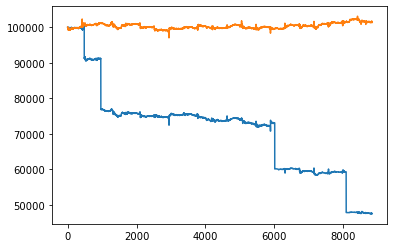

In [81]:
plt.plot(bt.portfolio_tracker['total_value'])
plt.plot(bt.portfolio_tracker['bah'])

In [86]:
bt.transaction_history['transaction_cost'].sum()

3452.05606

In [33]:
bt.transaction_history['transaction_cost'].sum()

4035.5475210000004

<AxesSubplot:>

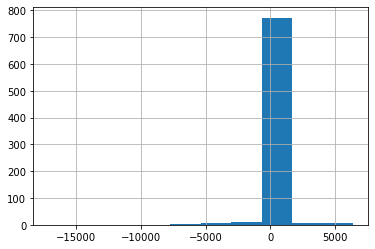

In [31]:
bt.transaction_history.pnl.hist()

In [22]:
bt.upload_to_dashboard("exp3_on_stocks")

Data uploaded.


In [8]:
bt.transaction_history['transaction_cost'].sum()

19413.64709480381